In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock= pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [3]:
stock.tail(2)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL
2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL


In [4]:
stock.index= pd.to_datetime(stock.index)

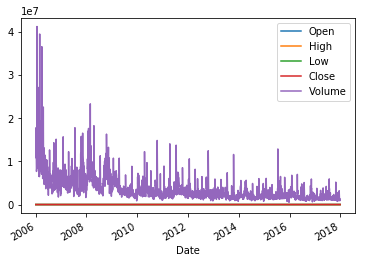

In [5]:
stock.plot()

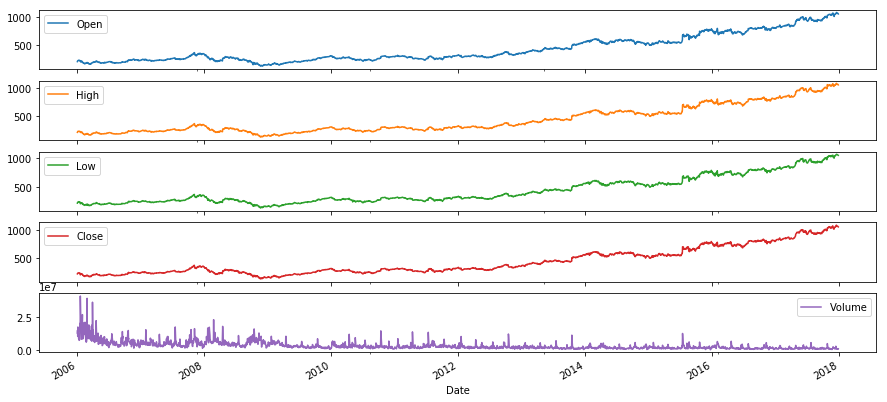

In [6]:
stock['2006':'2017'].plot(subplots=True, figsize=(15,7))
plt.show()

In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 245.1+ KB


In [8]:
stock.head(2)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL


In [9]:
stock= stock.drop(['Open','High','Low','Close','Name'], axis=1)

In [10]:
stock.head(5)

,Volume
Date,
2006-01-03,13137450
2006-01-04,15292353
2006-01-05,10815661
2006-01-06,17759521
2006-01-09,12795837


In [11]:
train_set= stock.head(2500)
test_set= stock.tail(150)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler= MinMaxScaler()

In [14]:
train_scaled= scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

In [15]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [16]:
import tensorflow as tf

D:\Jupyter\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.03 
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 4000
# Size of the batch of data
batch_size = 1

In [18]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [19]:
# Also play around with GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

In [20]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [21]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [22]:
init = tf.global_variables_initializer()

In [23]:
saver = tf.train.Saver()

In [24]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [25]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 0.032187954
100 	MSE: 0.00031471162
200 	MSE: 0.00144077
300 	MSE: 0.001623488
400 	MSE: 0.00061676174
500 	MSE: 0.054330636
600 	MSE: 0.0011127688
700 	MSE: 0.00018334943
800 	MSE: 0.00772736
900 	MSE: 0.0008046814
1000 	MSE: 0.0014575758
1100 	MSE: 0.0014498373
1200 	MSE: 0.00028200453
1300 	MSE: 0.0019406993
1400 	MSE: 0.008066322
1500 	MSE: 0.0018661033
1600 	MSE: 0.00019955973
1700 	MSE: 0.0001158607
1800 	MSE: 0.0020715026
1900 	MSE: 0.003554308
2000 	MSE: 0.0025481477
2100 	MSE: 0.007126343
2200 	MSE: 0.0014552294
2300 	MSE: 0.013202011
2400 	MSE: 0.004262003
2500 	MSE: 0.0017949719
2600 	MSE: 0.0004934864
2700 	MSE: 0.00033285315
2800 	MSE: 0.0008703395
2900 	MSE: 0.0053264797
3000 	MSE: 0.00091305
3100 	MSE: 0.0016216859
3200 	MSE: 0.0030225578
3300 	MSE: 0.054580044
3400 	MSE: 0.0008534929
3500 	MSE: 0.00027643153
3600 	MSE: 0.0007337302
3700 	MSE: 0.00024546697
3800 	MSE: 0.001889473
3900 	MSE: 0.0010034688


UnknownError: Failed to rename: ./ex_time_series_model.index.tempstate1657864583413358851 to: ./ex_time_series_model.index : Access is denied.
; Input/output error
	 [[Node: save/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/SaveV2/tensor_names, save/SaveV2/shape_and_slices, beta1_power, beta2_power, rnn/output_projection_wrapper/basic_lstm_cell/bias, rnn/output_projection_wrapper/basic_lstm_cell/bias/Adam, rnn/output_projection_wrapper/basic_lstm_cell/bias/Adam_1, rnn/output_projection_wrapper/basic_lstm_cell/kernel, rnn/output_projection_wrapper/basic_lstm_cell/kernel/Adam, rnn/output_projection_wrapper/basic_lstm_cell/kernel/Adam_1, rnn/output_projection_wrapper/bias, rnn/output_projection_wrapper/bias/Adam, rnn/output_projection_wrapper/bias/Adam_1, rnn/output_projection_wrapper/kernel, rnn/output_projection_wrapper/kernel/Adam, rnn/output_projection_wrapper/kernel/Adam_1)]]

Caused by op 'save/SaveV2', defined at:
  File "D:\Jupyter\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Jupyter\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Jupyter\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Jupyter\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Jupyter\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\Jupyter\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "D:\Jupyter\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "D:\Jupyter\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "D:\Jupyter\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\Jupyter\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "D:\Jupyter\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Jupyter\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "D:\Jupyter\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "D:\Jupyter\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\Jupyter\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "D:\Jupyter\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Jupyter\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\Jupyter\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\Jupyter\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\Jupyter\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Jupyter\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Jupyter\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\Jupyter\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Jupyter\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\Jupyter\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-416a2593f909>", line 1, in <module>
    saver = tf.train.Saver()
  File "D:\Jupyter\lib\site-packages\tensorflow\python\training\saver.py", line 1284, in __init__
    self.build()
  File "D:\Jupyter\lib\site-packages\tensorflow\python\training\saver.py", line 1296, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\training\saver.py", line 1333, in _build
    build_save=build_save, build_restore=build_restore)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\training\saver.py", line 778, in _build_internal
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\training\saver.py", line 278, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\training\saver.py", line 194, in save_op
    tensors)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1800, in save_v2
    shape_and_slices=shape_and_slices, tensors=tensors, name=name)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "D:\Jupyter\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

UnknownError (see above for traceback): Failed to rename: ./ex_time_series_model.index.tempstate1657864583413358851 to: ./ex_time_series_model.index : Access is denied.
; Input/output error
	 [[Node: save/SaveV2 = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/SaveV2/tensor_names, save/SaveV2/shape_and_slices, beta1_power, beta2_power, rnn/output_projection_wrapper/basic_lstm_cell/bias, rnn/output_projection_wrapper/basic_lstm_cell/bias/Adam, rnn/output_projection_wrapper/basic_lstm_cell/bias/Adam_1, rnn/output_projection_wrapper/basic_lstm_cell/kernel, rnn/output_projection_wrapper/basic_lstm_cell/kernel/Adam, rnn/output_projection_wrapper/basic_lstm_cell/kernel/Adam_1, rnn/output_projection_wrapper/bias, rnn/output_projection_wrapper/bias/Adam, rnn/output_projection_wrapper/bias/Adam_1, rnn/output_projection_wrapper/kernel, rnn/output_projection_wrapper/kernel/Adam, rnn/output_projection_wrapper/kernel/Adam_1)]]


In [ ]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

In [ ]:
train_seed

In [ ]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [ ]:
test_set['Generated'] = results

In [28]:
test_set.head(5)

,Volume
Date,
2017-05-30,1516685
2017-05-31,1724095
2017-06-01,1306384
2017-06-02,1735469
2017-06-05,1378916


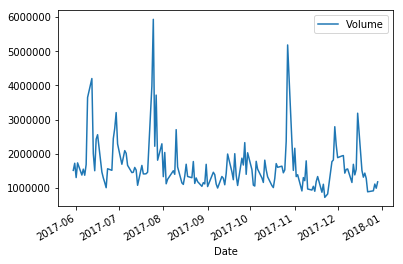

In [29]:
test_set.plot()